Limitations
- population was rounded to the nearest 1000, so values may be slightly off
- not all users/non-users are captured in these surveys; survey responses were voluntary 
- 2023 survey data not available yet 

In [26]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [7]:
filepath = Path("Resources/cannabisdataset.csv")
data_file_df = pd.read_csv(filepath, encoding="utf-8")

In [19]:
data_file_df

,Year,Used - Females,Not Used - Females,Used - Males,Not Used - Males,Used - 16-19,Not Used - 16-19,Used - 20-24,Not Used - 20-24,Used - 25+,Not Used - 25+,Used - Overall Total,Not Used - Overall Total
0,2017,2589650,12208350,3656088,10351912,666231,954769,1002621,1240379,4607912,20435088,6272819,22634181
1,2018,2447456,11458544,3887550,10782450,591665,1029335,982434,1260566,4733127,20309873,6330414,22575586
2,2019,3072087,11768913,4021732,10040268,718103,902897,1150659,1092341,5233987,19809013,7111122,21795878
3,2020,3473262,11369738,4317341,9745659,705135,1063376,1177575,1065425,5910148,19132852,7775983,21131017
4,2021,3280303,11562697,4022018,10040982,594907,1024472,1090098,1152902,5609632,19433368,7284564,21622436
5,2022,3863574,11778426,4434210,10495790,591008,1014992,1105404,1096596,6610461,20152539,8315584,22256416


In [20]:
reindexed_df = data_file_df.set_index("Year")
reindexed_df

,Used - Females,Not Used - Females,Used - Males,Not Used - Males,Used - 16-19,Not Used - 16-19,Used - 20-24,Not Used - 20-24,Used - 25+,Not Used - 25+,Used - Overall Total,Not Used - Overall Total
Year,,,,,,,,,,,,
2017,2589650,12208350,3656088,10351912,666231,954769,1002621,1240379,4607912,20435088,6272819,22634181
2018,2447456,11458544,3887550,10782450,591665,1029335,982434,1260566,4733127,20309873,6330414,22575586
2019,3072087,11768913,4021732,10040268,718103,902897,1150659,1092341,5233987,19809013,7111122,21795878
2020,3473262,11369738,4317341,9745659,705135,1063376,1177575,1065425,5910148,19132852,7775983,21131017
2021,3280303,11562697,4022018,10040982,594907,1024472,1090098,1152902,5609632,19433368,7284564,21622436
2022,3863574,11778426,4434210,10495790,591008,1014992,1105404,1096596,6610461,20152539,8315584,22256416


In [21]:
reindexed_df["Total"] = reindexed_df["Used - Overall Total"] + reindexed_df["Not Used - Overall Total"]
reindexed_df

,Used - Females,Not Used - Females,Used - Males,Not Used - Males,Used - 16-19,Not Used - 16-19,Used - 20-24,Not Used - 20-24,Used - 25+,Not Used - 25+,Used - Overall Total,Not Used - Overall Total,Total
Year,,,,,,,,,,,,,
2017,2589650,12208350,3656088,10351912,666231,954769,1002621,1240379,4607912,20435088,6272819,22634181,28907000
2018,2447456,11458544,3887550,10782450,591665,1029335,982434,1260566,4733127,20309873,6330414,22575586,28906000
2019,3072087,11768913,4021732,10040268,718103,902897,1150659,1092341,5233987,19809013,7111122,21795878,28907000
2020,3473262,11369738,4317341,9745659,705135,1063376,1177575,1065425,5910148,19132852,7775983,21131017,28907000
2021,3280303,11562697,4022018,10040982,594907,1024472,1090098,1152902,5609632,19433368,7284564,21622436,28907000
2022,3863574,11778426,4434210,10495790,591008,1014992,1105404,1096596,6610461,20152539,8315584,22256416,30572000


Text(0.5, 1.0, 'Cannabis Use by Gender from 2017-2022')

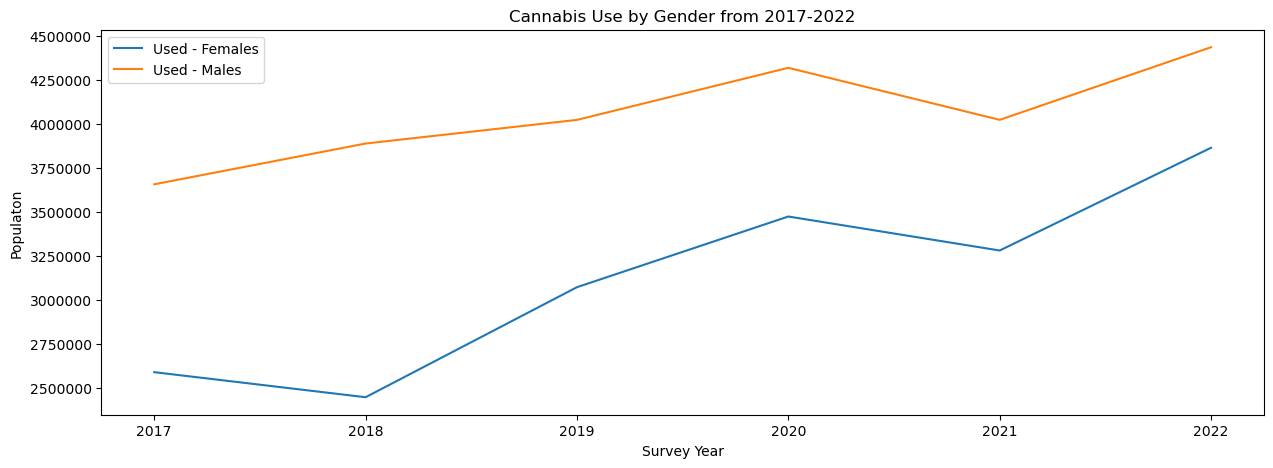

In [70]:
gender_line_plot = reindexed_df[["Used - Females", "Used - Males"]]

# Use DataFrame.plot() in order to create a bar chart of the data
gender_line_plot.plot(kind="line", figsize=(15,5))

plt.xlabel("Survey Year")
plt.ylabel("Populaton")
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 10000))
plt.legend(loc="best")
plt.title("Cannabis Use by Gender from 2017-2022")

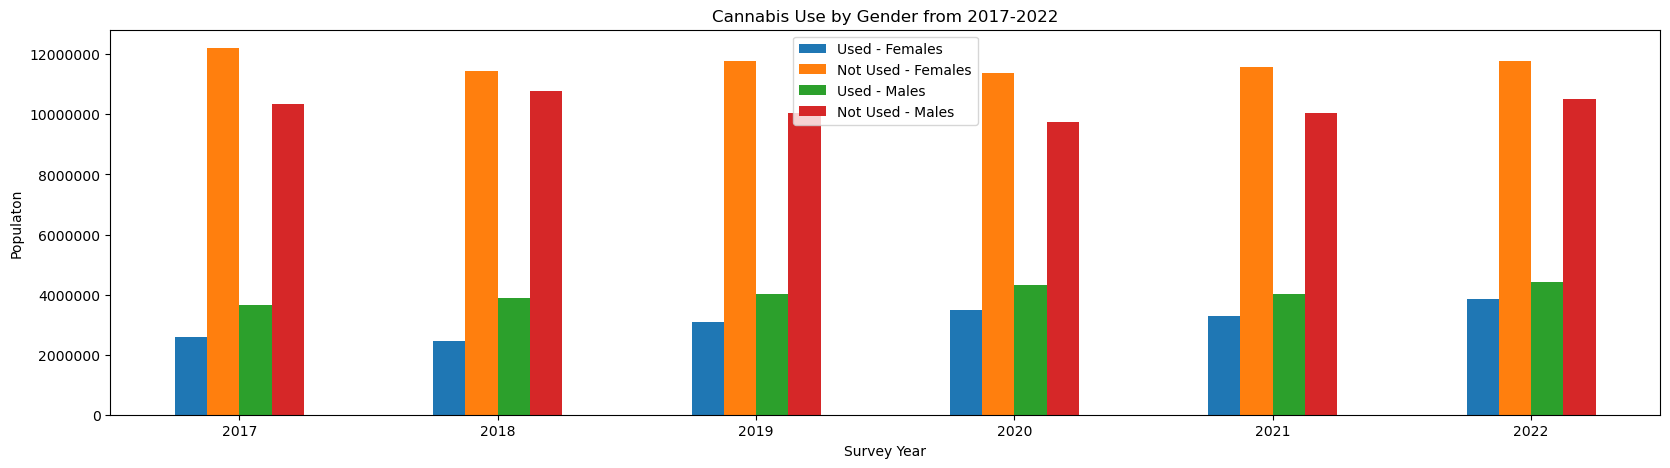

In [64]:
gender_bar_plot = reindexed_df[["Used - Females", "Not Used - Females", "Used - Males", "Not Used - Males"]]

plot = gender_bar_plot.plot(kind="bar", figsize=(20,5), rot = 0)

plt.title("Cannabis Use by Gender from 2017-2022")
plt.xlabel("Survey Year")
plt.ylabel("Populaton")
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 10000))

plt.legend(loc="best")


Text(0, 0.5, '')

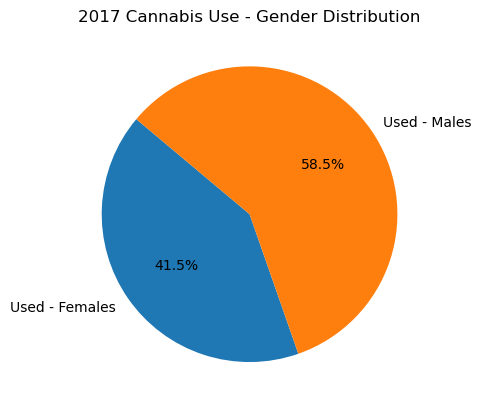

In [99]:
pie_2017_df.plot.pie(autopct="%1.1f%%", startangle=140)
plt.title("2017 Cannabis Use - Gender Distribution")
plt.ylabel("")

<Axes: ylabel='2022'>

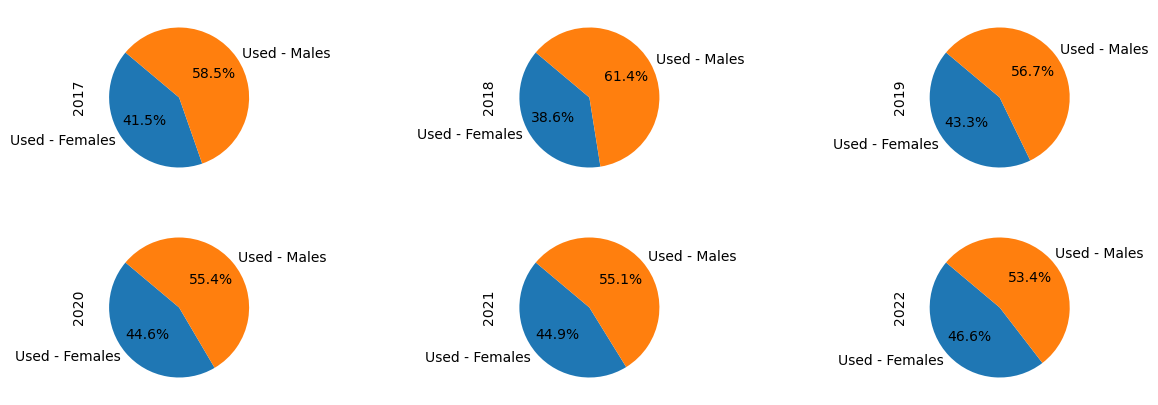

In [113]:
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(15,5)
gender_pie_plot = reindexed_df[["Used - Females", "Used - Males"]]
pie_2017_df = gender_pie_plot.iloc[0, :]
pie_2018_df = gender_pie_plot.iloc[1, :]
pie_2019_df = gender_pie_plot.iloc[2, :]
pie_2020_df = gender_pie_plot.iloc[3, :]
pie_2021_df = gender_pie_plot.iloc[4, :]
pie_2022_df = gender_pie_plot.iloc[5, :]

pie_2017_df.plot.pie(ax=axes[0,0], autopct="%1.1f%%", startangle=140)
pie_2018_df.plot.pie(ax=axes[0,1], autopct="%1.1f%%", startangle=140)
pie_2019_df.plot.pie(ax=axes[0,2], autopct="%1.1f%%", startangle=140)
pie_2020_df.plot.pie(ax=axes[1,0], autopct="%1.1f%%", startangle=140)
pie_2021_df.plot.pie(ax=axes[1,1], autopct="%1.1f%%", startangle=140)
pie_2022_df.plot.pie(ax=axes[1,2], autopct="%1.1f%%", startangle=140)


In [ ]:
gender_pie_plot = reindexed_df[["Used - Females", "Used - Males"]]

labels = ["Humans", "Smurfs", "Hobbits", "Ninjas"]

# The values of each section of the pie chart
sizes = [220, 95, 80, 100]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to pop out the "Humans" section from the others
# Set the explode levels for each slice; needs to be the same number of slices
explode = (0.1, 0, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

In [65]:
reindexed_df

,Used - Females,Not Used - Females,Used - Males,Not Used - Males,Used - 16-19,Not Used - 16-19,Used - 20-24,Not Used - 20-24,Used - 25+,Not Used - 25+,Used - Overall Total,Not Used - Overall Total,Total
Year,,,,,,,,,,,,,
2017,2589650,12208350,3656088,10351912,666231,954769,1002621,1240379,4607912,20435088,6272819,22634181,28907000
2018,2447456,11458544,3887550,10782450,591665,1029335,982434,1260566,4733127,20309873,6330414,22575586,28906000
2019,3072087,11768913,4021732,10040268,718103,902897,1150659,1092341,5233987,19809013,7111122,21795878,28907000
2020,3473262,11369738,4317341,9745659,705135,1063376,1177575,1065425,5910148,19132852,7775983,21131017,28907000
2021,3280303,11562697,4022018,10040982,594907,1024472,1090098,1152902,5609632,19433368,7284564,21622436,28907000
2022,3863574,11778426,4434210,10495790,591008,1014992,1105404,1096596,6610461,20152539,8315584,22256416,30572000


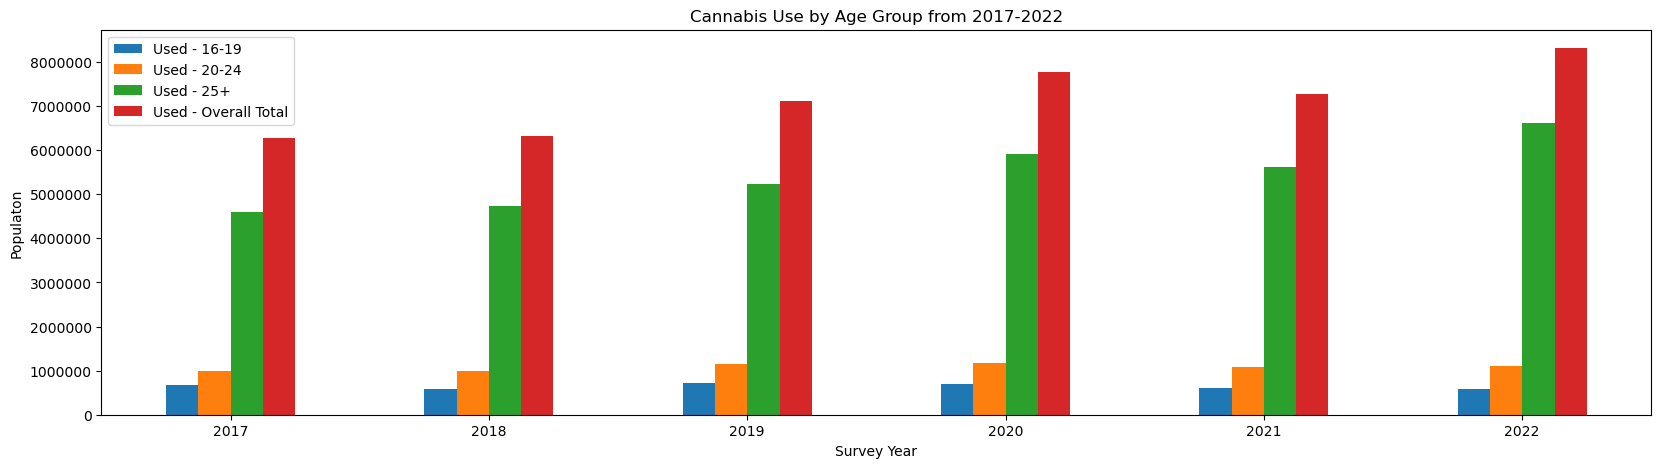

In [68]:
age_bar_plot = reindexed_df[["Used - 16-19","Used - 20-24", "Used - 25+", "Used - Overall Total"]]

plot = age_bar_plot.plot(kind="bar", figsize=(20,5), rot = 0)

plt.title("Cannabis Use by Age Group from 2017-2022")
plt.xlabel("Survey Year")
plt.ylabel("Populaton")
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 10000))

plt.legend(loc="best")


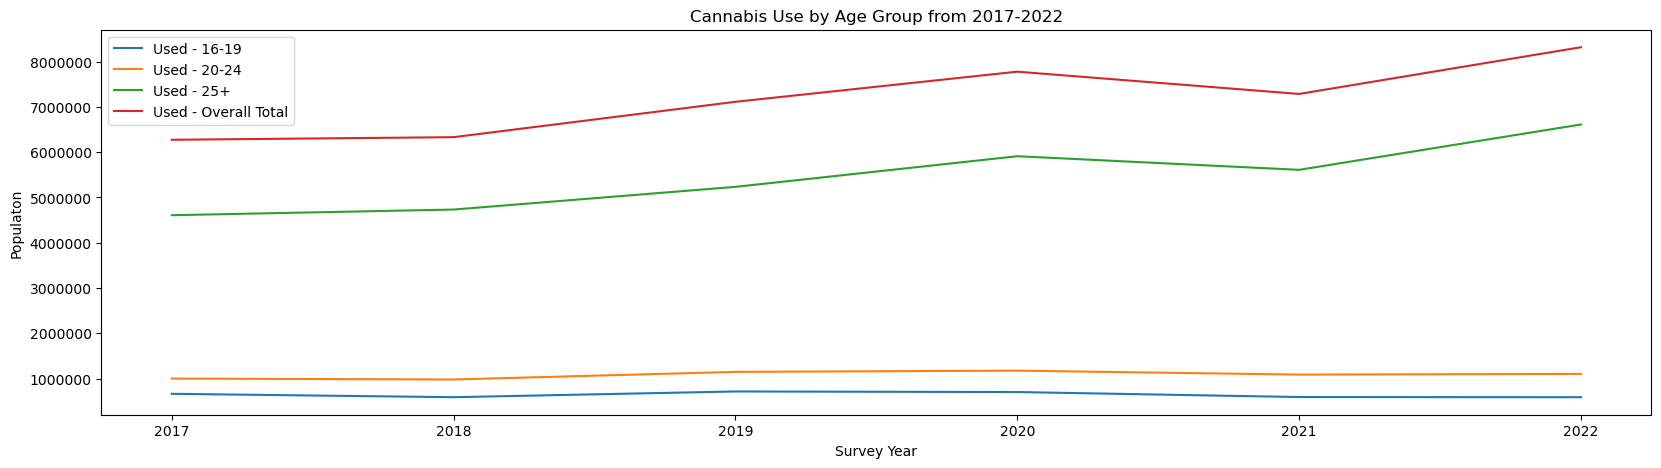

In [69]:
age_line_plot = reindexed_df[["Used - 16-19","Used - 20-24", "Used - 25+", "Used - Overall Total"]]

plot = age_line_plot.plot(kind="line", figsize=(20,5), rot = 0)

plt.title("Cannabis Use by Age Group from 2017-2022")
plt.xlabel("Survey Year")
plt.ylabel("Populaton")
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 10000))

plt.legend(loc="best")
